# Project: tmdb-movies Data Analysis

BY : DAVID KAYODE OLUWADARE

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. In this report, the data analysis process will be used to answer the following questions: 
        
         ● What is the relationship between runtime and vote average?
         ● What is the correlation between vote average, popularity and release year
         ● What is the yearly revenue change?
         ● Checking the percantage distribution of the genre.
          
   
   
   As i go on to perform my analysis, some of these columns would neither take a new shape and dimensions as well as get deleted if not needed. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time
   
   This report will use some libaries of Python including Numpy, Pandas, and Matplotlib. The import statement of these libraries is stated below:


In [3]:
# import packages and the libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### Data Loading

This Data was downloaded and read from the file directory (r'Path where the CSV file is stored\File name.csv') on my machine.

In [4]:
# Loading data,and Performing operations to inspect data

df = pd.read_csv(r'C:\Users\Owner\Desktop\Project Folder\movie\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

In [11]:
# Checking the whole dimension of the data

df.shape

(10866, 21)

In [12]:
#information encompassing the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
#checking for duplicates and dropping them 

df.duplicated().sum()


1

In [14]:
df.drop_duplicates(inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The duplicate value shows '1' which is arguably not needed

In [17]:
#checking the numbers of missing values 

df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Nine (9) columns had Nan value from the isnull() method above.


In [18]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10861     True
10862     True
10863     True
10864     True
10865     True
Length: 10865, dtype: bool

In the midst of the null values, we have irrelevant columns which are not needed for the analysis, as well as 
the case of the budget and revenue confusing the ones having the '_adj' associated with movie in terms of 2010 dollars, accounting for inflation over time


In [19]:
#Removing Columns to make the work easier to analyse using the drop() method

df.drop(['imdb_id','homepage','budget','revenue','tagline','overview','release_date','keywords'], axis=1, inplace=True)

In [20]:
df.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [21]:
#checking for missing values again

df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [22]:
#remove rows with null values

df.dropna(inplace = True)

df.shape

(9772, 13)

In [23]:
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Finally there are no null values anymore, 
and also the shaped had been reduce from (10866, 21) to (9772, 12) Rows and columns respectively.

In [24]:
#rename columns having the _adj

df.rename(columns = {'budget_adj':'budget', 'revenue_adj':'revenue'}, inplace=True)
df.head(20)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08


In [25]:
#information encompassing the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   original_title        9772 non-null   object 
 3   cast                  9772 non-null   object 
 4   director              9772 non-null   object 
 5   runtime               9772 non-null   int64  
 6   genres                9772 non-null   object 
 7   production_companies  9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
 11  budget                9772 non-null   float64
 12  revenue               9772 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.0+ MB


In [26]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


From the statistics above, the minimum budget, revenue, and runtime is 0, as well as the 25% of budgt and revenue are also 0.
So, we need to clean the invalid data and re-check statistics.

In [27]:
# Cleaning the invalid data and check the statistics again

missing_value = df.query('budget == 0 or revenue == 0 or runtime == 0').index
df.drop(missing_value, axis=0, inplace=True)

df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,40040.372668,1.203784,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,67585.708616,1.480569,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,5.000000,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5925.000000,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,11253.000000,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,38579.000000,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Now the data is ready for EDA

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : What is the relationship between runtime and vote average?

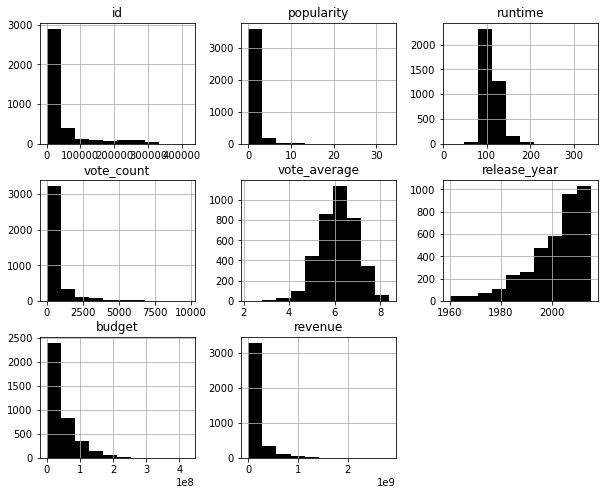

In [28]:
# Using the histogram to explore the data

df.hist(figsize=(10,8),color='black');

The Histogram gave an holistic view of what to expect from the data set

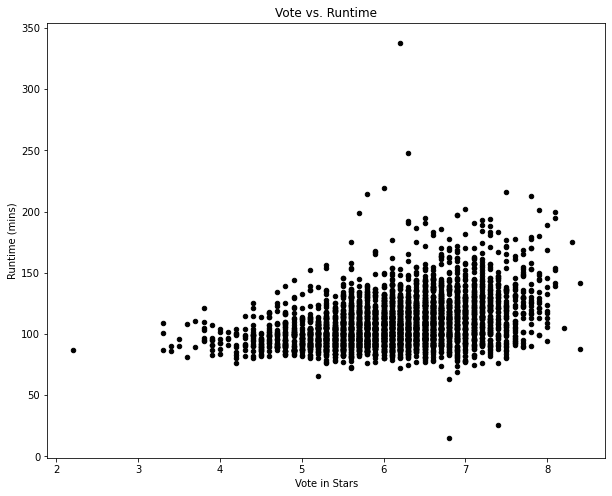

In [29]:
# Scatter plot of these two columns

df.plot(x='vote_average', y='runtime', kind='scatter', color ='black', figsize=(10,8))
plt.title('Vote vs. Runtime')
plt.xlabel('Vote in Stars')
plt.ylabel('Runtime (mins)');

From the plot above : 
   
   The vote of movie with a runtime of around 100 minutes are the best votes run from low to high.
   Movies with a runtime above or below 100 minues tend to have mid-to-high votes.
   movies with long runtimes consistently get higher-than-average votes.


### Research Question 2 : What is the correlation between vote average, popularity and release year?

This scatter plot above suggests a weaker relationship between vote average and runtime.
Though it appears that the longest movies have a higher vote average, there doesn't seem to be a decisive pattern between the two variables in general.

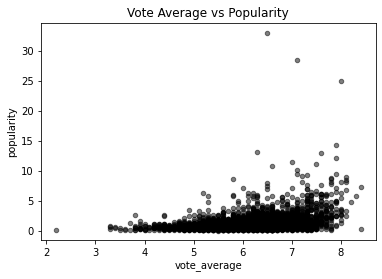

In [30]:
#plotting the vote average and popularity to see their relationship

df.plot(x='vote_average',y='popularity',kind='scatter', color='black', alpha=0.5)
plt.title('Vote Average vs Popularity')
plt.show()

The 'popularity' and 'vote_average' rows are the bset rows that can be used to understand the favorability of a movie.
The scatter plot above illustrates that both columns are positively correlated. 

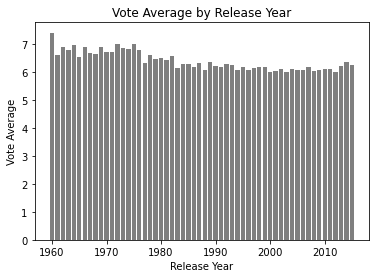

In [31]:
#Grouping new data frame into a new variable release year

every_year_df = df.groupby('release_year').mean()
plt.bar(every_year_df.index,every_year_df['vote_average'], color = 'black', alpha=0.5)
plt.title('Vote Average by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.show()

I made a new dataframe that grouped the movies by release year. Then I plotted the vote average by release year on a bar chart.


In this bar chart, there seems to be a slight downward slope in vote average over time. Though there isn't necessarily a clear trend, it is safe to say that the most highly voted movie were released between 1960 to around 1980 and the popularity between 0 and 5 have the progressing mid-high vote.


### Research Question 3: Checking the percentage distribution of the genre.

Next i want to split the genres column above into different rows

In [86]:
#calling out the column  'genre' 

df_genres = df['genres']
df_genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

Next i want to split the genres column above into different rows

In [93]:
# Splitting the row with more than one genre into different rows

from itertools import chain

# Return list from series of '|'-separated strings

def my_function(s):
    return list(chain.from_iterable(s.str.split('|')))

In [100]:
# Calculating lengths of splits

lens = df['genres'].str.split('|').map(len)

In [101]:
# Creating new dataframe, repeating or chaining as appropriate

df_genres = pd.DataFrame({'genres': my_function(df['genres'])})

In [98]:
#Checking the header

df_genres.head(10)

,genres
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Action
5,Adventure
6,Science Fiction
7,Thriller
8,Adventure
9,Science Fiction


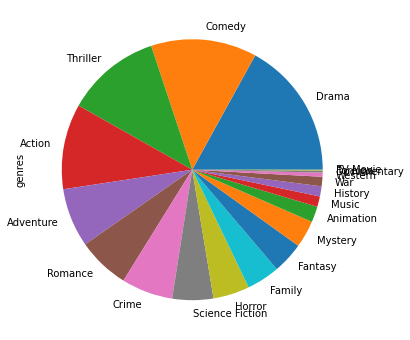

In [99]:
# Drawing the pie chart of genres

df_genres['genres'].value_counts().plot(kind='pie', figsize=(6,6));

From the pie chart, the 'Animation','Fantasy', and 'Adventure' respectively accounts for a majority of percentage over the year, while other genres like 'Thriller' and 'History' are less frequent to become the most popular genre.

<a id='conclusions'></a>
## CONCLUSIONS

In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity.

After cleaning the dataset by removing unnecessary, null, and duplicated values, i checked what the relationship between runtime and vote average was.

I continued from there to check some correlation between vote average, popularity and release year. Because only vote average was more evenly distributed, I plotted a few charts and the most highly voted movies were released between 1960 and 1980 and popularity between 0 and 5 have the progressing mid-high vote. 
 
Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. 

And lastly, i Checked the percantage distribution of the genre to decipher what genre have the highest %, and From the pie chart, the 'Animation','Fantasy', and 'Adventure' respectively accounts for a majority of percentage over the year, while other genres like 'Thriller' and 'History' are less frequent to become the most popular genre.

## REFERENCES


 https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe.
 https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py.